<a href="https://colab.research.google.com/github/kandgesid/Data-Science-and-ML-projects/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install h5py pyyaml

In [ ]:
%tensorflow_version 2.x

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import tensorflow as tf


In [ ]:
print(tf.__version__)

2.1.0


In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

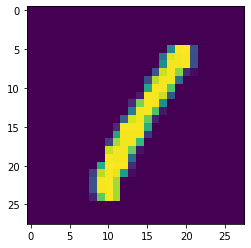

In [ ]:
plt.imshow(X_train[3])

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train.max()

255

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [ ]:
X_train[0].shape

(28, 28, 1)

In [ ]:
input_shape = X_train[0].shape

In [ ]:
def create_model():
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=(3, 3), activation= 'relu', input_shape = input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPool2D(2, 2))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

  return model

model = create_model()
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)              

In [ ]:
file_path = "/content/drive/My Drive/DSAI/MNIST/epoch:{epoch:03d}.hdf5"
# Create checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(file_path, 
                                                 save_weights_only=True,
                                                 monitor = 'val_acc',
                                                 verbose=1)

model = create_model()
model.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test), callbacks=[cp_callback])
model.save('my_model.h5')


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
59136/60000 [============================>.] - ETA: 0s - loss: 0.2426 - accuracy: 0.9259
Epoch 00001: saving model to /content/drive/My Drive/DSAI/MNIST/epoch:001.hdf5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2408 - accuracy: 0.9264 - val_loss: 0.0549 - val_accuracy: 0.9818
Epoch 2/10
59136/60000 [============================>.] - ETA: 0s - loss: 0.0895 - accuracy: 0.9736
Epoch 00002: saving model to /content/drive/My Drive/DSAI/MNIST/epoch:002.hdf5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0891 - accuracy: 0.9737 - val_loss: 0.0421 - val_accuracy: 0.9869
Epoch 3/10
59392/60000 [============================>.] - ETA: 0s - loss: 0.0694 - accuracy: 0.9787
Epoch 00003: saving model to /content/drive/My Drive/DSAI/MNIST/epoch:003.hdf5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0693 - accuracy: 0.9788 - val_loss: 0.0355 - val_accuracy: 0.9883

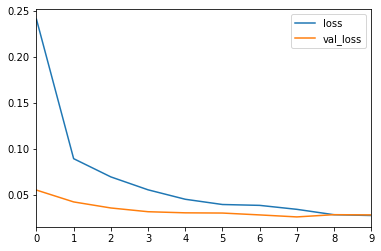

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['loss', 'val_loss']].plot()

In [ ]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 86us/sample - loss: 0.0279 - accuracy: 0.9911


[0.02792717568554358, 0.9911]

In [ ]:
model.load_weights('/content/drive/My Drive/DSAI/MNIST/epoch:010.hdf5')